# Get Histogram of timepoints NCRNA

In [16]:
# load the data

import pandas as pd
import numpy as np
import CausalTests as ct
reload(ct.pac)
reload(ct)
import multi_testing as mt

import scipy.stats as stats
import geneTSmunging as gtm
reload(gtm)
import matplotlib.pyplot as plt
%matplotlib inline

filenames = ["../data/GeneExpressionData/featurecounts.genes.TPM.selected_reps.ln.surrogate_variables_corrected.ncrna.txt"]
names = ["NCRNA_TPM"]
original_keys = ["gene", "t00_rep1", "t00_rep2plusextra", "t00_rep3plusextra", "t00_rep4", "t05_rep1", "t05_rep2", "t05_rep3", "t05_rep4", "t1_rep1", "t1_rep2", "t1_rep3", "t1_rep4", "t2_rep1", "t2_rep2", "t2_rep3", "t2_rep4", "t3_rep1", "t3_rep2", "t3_rep3", "t3_rep4", "t4_rep1", "t4_rep2", "t4_rep3", "t4_rep4", "t5_rep2", "t5_rep3", "t5_rep4", "t6_rep2", "t6_rep3", "t6_rep4", "t7_rep1", "t7_rep2", "t7_rep3", "t7_rep4", "t8_rep1", "t8_rep2", "t8_rep3", "t8_rep4", "t10_rep1", "t10_rep2", "t10_rep3", "t10_rep4", "t12_rep1", "t12_rep2", "t12_rep3", "t12_rep4"]
keys = ["t00", "t05", "t1_", "t2_", "t3_", "t4_", "t5_", "t6_", "t7_", "t8_", "t10_", "t12_"]
fold_keys = []
for i in range(len(keys) - 1):
    key1 = keys[i]
    key2 = keys[i + 1]
    fold_key = key1 + "-" + key2 + " fold"
    fold_keys.append(fold_key)

diff_keys = []
for i in range(len(keys) - 1):
    key1 = keys[i]
    key2 = keys[i + 1]
    diff_key = key1 + "-" + key2 + " diff"
    diff_keys.append(diff_key)    
    
normal_diff_keys = []
for i, diff_key in zip(range(len(keys) - 1), diff_keys):
    key1 = keys[i]
    key2 = keys[i + 1]
    normal_diff_key = key1 + "-" + key2 + " normal_diff"
    normal_diff_keys.append(normal_diff_key)

datas = []
for filename in filenames:
    datas.append(gtm.load_file_and_avg(filename))
data = datas[0]
name = names[0]
print name

p_matr_dict = {}
sig_matr_dict = {}

model_orders = range(1,4)

['t00_rep1', 't00_rep2plusextra', 't00_rep3plusextra', 't00_rep4']
['t05_rep1', 't05_rep2', 't05_rep3', 't05_rep4']
['t1_rep1', 't1_rep2', 't1_rep3', 't1_rep4']
['t2_rep1', 't2_rep2', 't2_rep3', 't2_rep4']
['t3_rep1', 't3_rep2', 't3_rep3', 't3_rep4']
['t4_rep1', 't4_rep2', 't4_rep3', 't4_rep4']
['t5_rep2', 't5_rep3', 't5_rep4']
['t6_rep2', 't6_rep3', 't6_rep4']
['t7_rep1', 't7_rep2', 't7_rep3', 't7_rep4']
['t8_rep1', 't8_rep2', 't8_rep3', 't8_rep4']
['t10_rep1', 't10_rep2', 't10_rep3', 't10_rep4']
['t12_rep1', 't12_rep2', 't12_rep3', 't12_rep4']
t00 has 4 data points
t05 has 4 data points
t1_ has 4 data points
t2_ has 4 data points
t3_ has 4 data points
t4_ has 4 data points
t5_ has 3 data points
t6_ has 3 data points
t7_ has 4 data points
t8_ has 4 data points
t10_ has 4 data points
t12_ has 4 data points
NCRNA_TPM


In [39]:
percentile_zoom = 10
a = np.array([1,2,3,4,5,6,7,8,9,10])
top_percentile = stats.scoreatpercentile(a, 100 - percentile_zoom)
bottom_percentile = stats.scoreatpercentile(a, percentile_zoom)
print a < top_percentile
print a > bottom_percentile
print (a < top_percentile) & (a > bottom_percentile)
print ((a < top_percentile) + (a > bottom_percentile))/2
new_indices = np.where((a < top_percentile) & (a > bottom_percentile))[0]
a[new_indices]

[ True  True  True  True  True  True  True  True  True False]
[False  True  True  True  True  True  True  True  True  True]
[False  True  True  True  True  True  True  True  True False]
[0 0 0 0 0 0 0 0 0 0]


array([2, 3, 4, 5, 6, 7, 8, 9])

In [8]:

def plot_timepoint_histogram(matr, x_label="Value", title_prefix="Histogram of timepoint ", bins=30,
                            time_names=["t00", "t05", "t1_", "t2_", "t3_", "t4_", "t5_", "t6_", "t7_", "t8_", "t10_", "t12_"],
                            same_axes=True, percentile_zoom = None, xlim=None, save_prefix=None, line_color_labels=None,
                             horizontal_line_color_labels=None, ylim=None):
    """
    Given matr, an N x T matrix, plot the histogram of values at each timepoint t.
    percentile_zoom: removes the tails
    """
    
    matr = np.array(matr)
    T = matr.shape[1]
    
    if time_names == None:
        time_names = [str(t) for t in range(T)]
    
    trans_matr = matr.T
    
    
    if percentile_zoom != None:
        trans_matr = []
        for t in range(T):
            top_percentile = stats.scoreatpercentile(matr[:, t], 100 - percentile_zoom)
            bottom_percentile = stats.scoreatpercentile(matr[:, t], percentile_zoom)
            
            new_array = matr[:,t]
            new_indices = np.where((new_array < top_percentile) & (new_array > bottom_percentile))[0]
            trans_matr.append(new_array[new_indices])
    
        trans_matr = np.array(trans_matr)
        
    if same_axes:
        if not xlim:
            min_value = np.min(np.concatenate(tuple(trans_matr)))
            max_value = np.max(np.concatenate(tuple(trans_matr)))
        else:
            min_value = xlim[0]
            max_value = xlim[1]
        bins = np.linspace(min_value, max_value, bins)
        print bins
    
    figs = []
    for t, time_name in zip(range(T), time_names):
        title = title_prefix + time_name
        fig = plt.figure(figsize=(8,8))
        plt.hist(trans_matr[t], bins=bins)
        
        plt.title(title, fontsize=20)
        plt.xlabel(x_label, fontsize=20)
        plt.ylabel("Frequency", fontsize=20)
        if line_color_labels != None:
            for line, color, label in line_color_labels:
                plt.axvline(line, color=color,label=label)
            plt.legend(loc='best')
        
        if horizontal_line_color_labels !=None:
            for line, color, label in horizontal_line_color_labels:
                plt.axhline(line, color=color,label=label)
            plt.legend(loc='best')                        

        
        if save_prefix:
            filename = save_prefix + time_name
            fig.savefig(filename)
        figs.append(fig)
        plt.show()
    
    if save_prefix:
        print "All images saved with prefix:", save_prefix
    
    return figs
        

[-0.49878097 -0.25968337 -0.02058576  0.21851185  0.45760945  0.69670706
  0.93580466  1.17490227  1.41399988  1.65309748  1.89219509  2.13129269
  2.3703903   2.60948791  2.84858551  3.08768312  3.32678072  3.56587833
  3.80497594  4.04407354  4.28317115  4.52226875  4.76136636  5.00046396
  5.23956157  5.47865918  5.71775678  5.95685439  6.19595199  6.4350496 ]


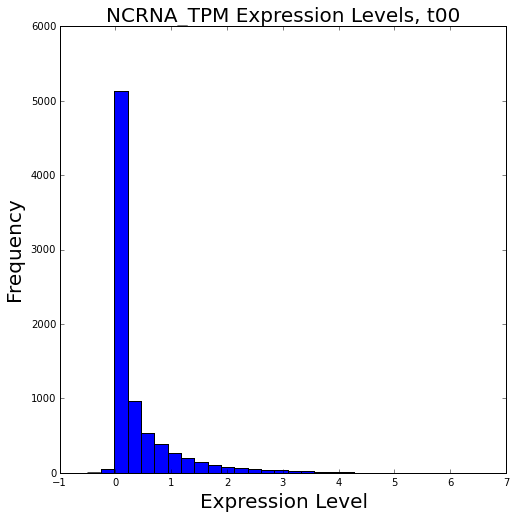

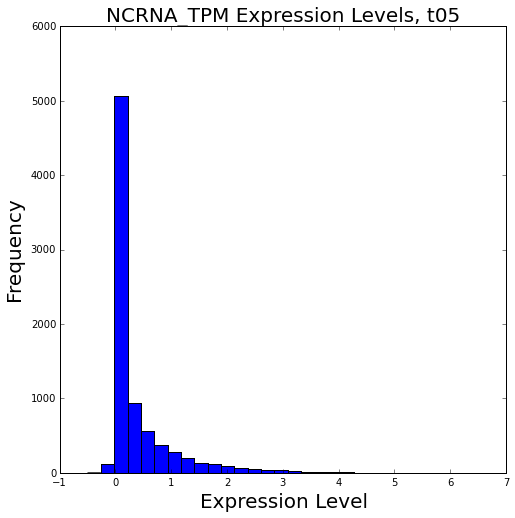

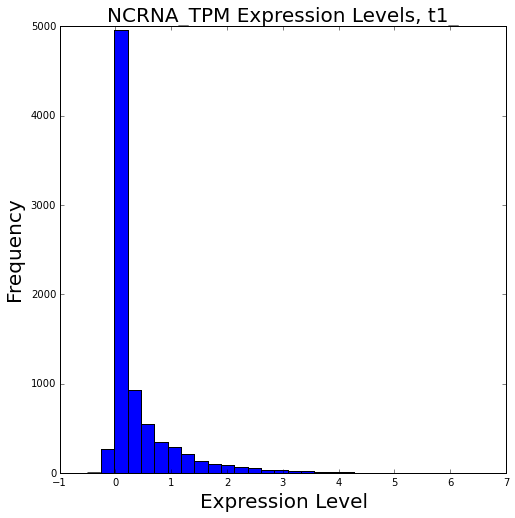

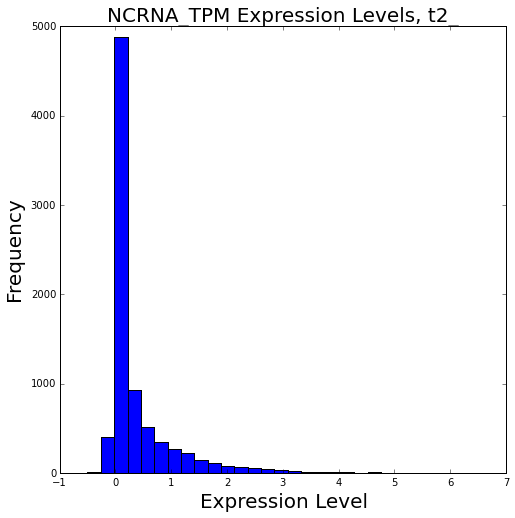

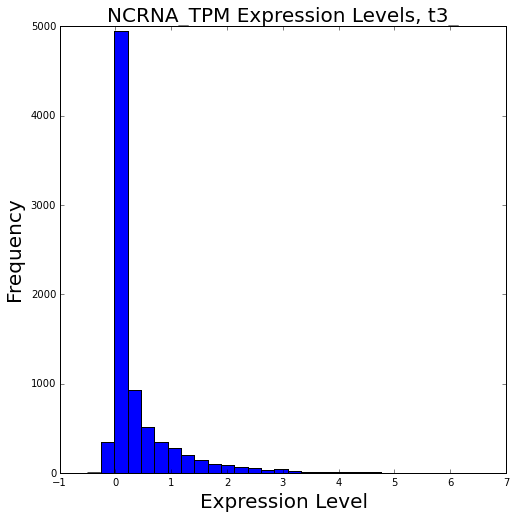

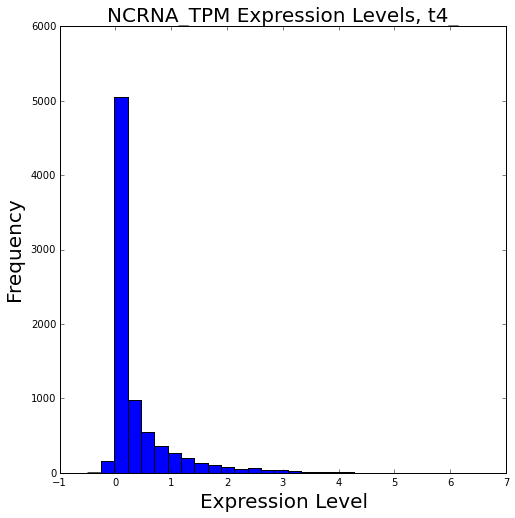

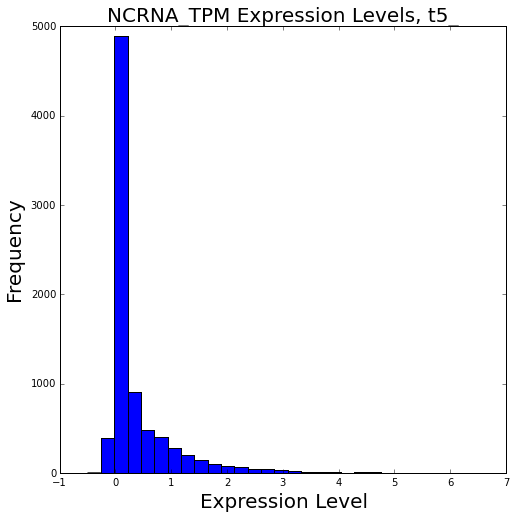

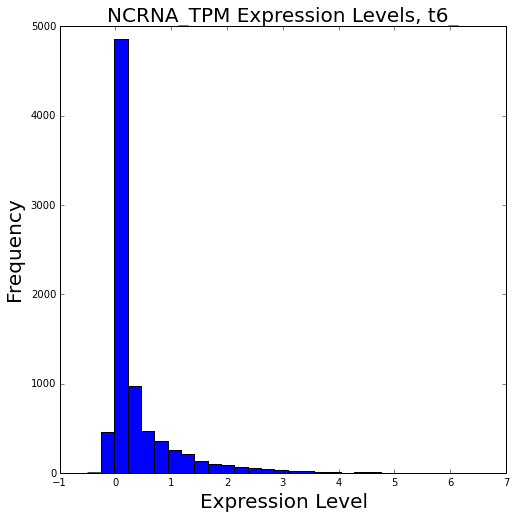

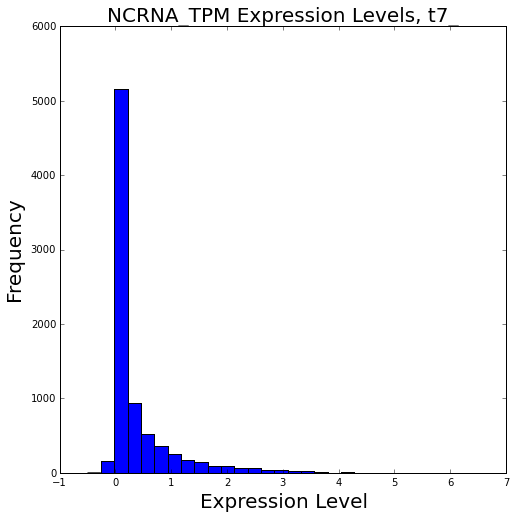

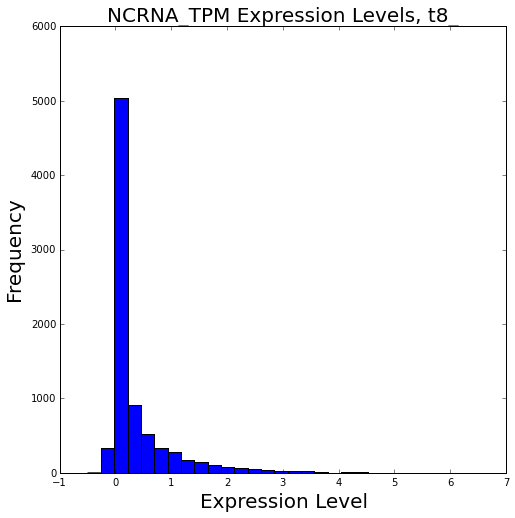

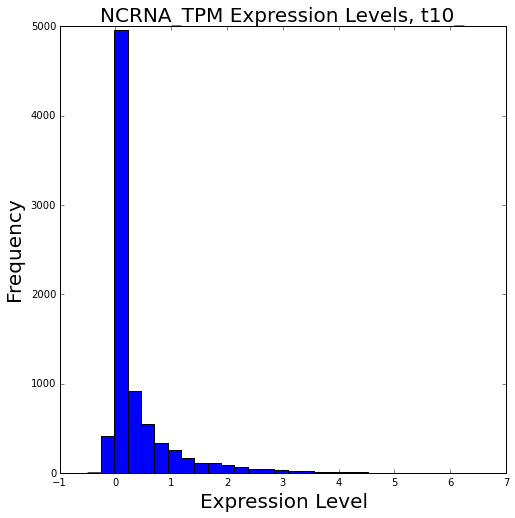

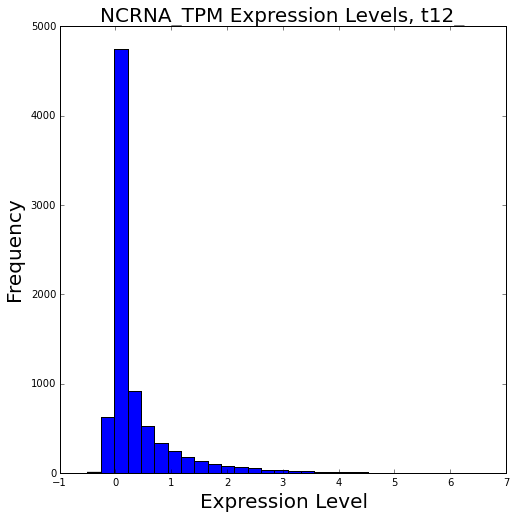

In [92]:
# Plot the expression histograms

TS = data[keys].values
plot_timepoint_histogram(TS, x_label="Expression Level", title_prefix=name + " Expression Levels, ", same_axes=True)

[-2.         -1.91525424 -1.83050847 -1.74576271 -1.66101695 -1.57627119
 -1.49152542 -1.40677966 -1.3220339  -1.23728814 -1.15254237 -1.06779661
 -0.98305085 -0.89830508 -0.81355932 -0.72881356 -0.6440678  -0.55932203
 -0.47457627 -0.38983051 -0.30508475 -0.22033898 -0.13559322 -0.05084746
  0.03389831  0.11864407  0.20338983  0.28813559  0.37288136  0.45762712
  0.54237288  0.62711864  0.71186441  0.79661017  0.88135593  0.96610169
  1.05084746  1.13559322  1.22033898  1.30508475  1.38983051  1.47457627
  1.55932203  1.6440678   1.72881356  1.81355932  1.89830508  1.98305085
  2.06779661  2.15254237  2.23728814  2.3220339   2.40677966  2.49152542
  2.57627119  2.66101695  2.74576271  2.83050847  2.91525424  3.        ]


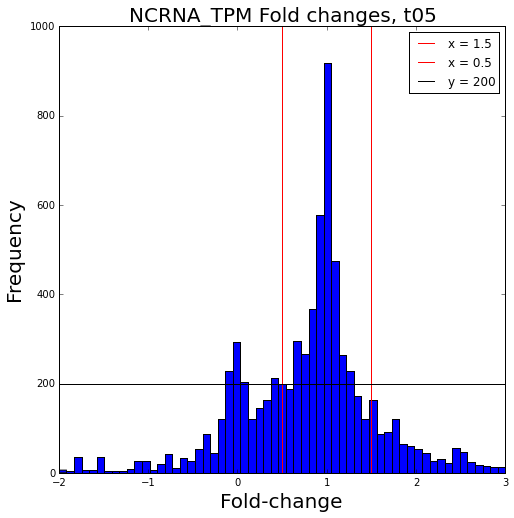

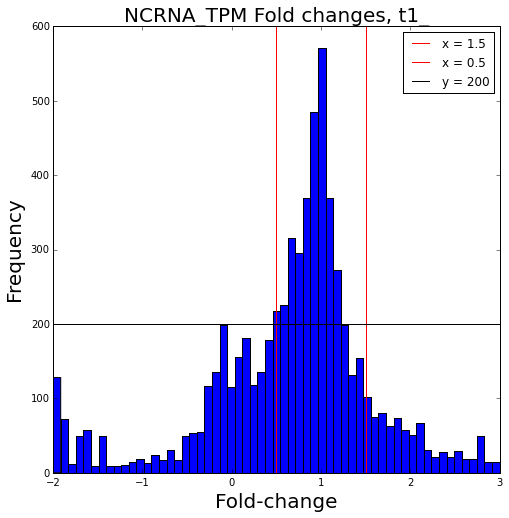

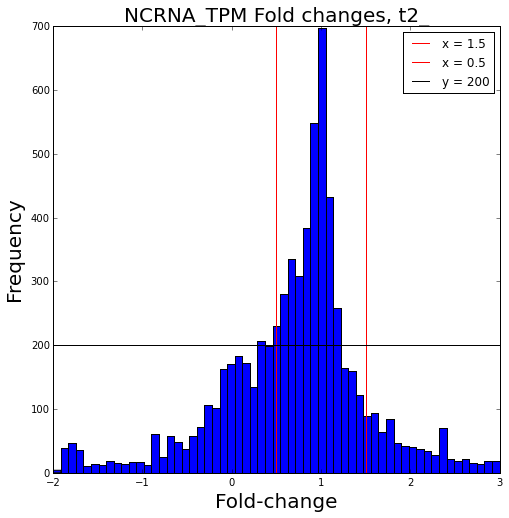

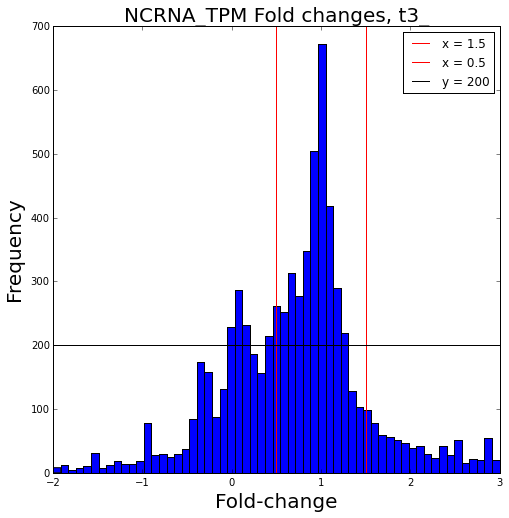

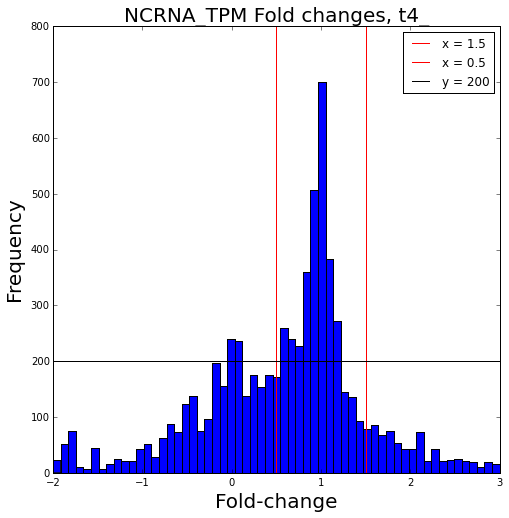

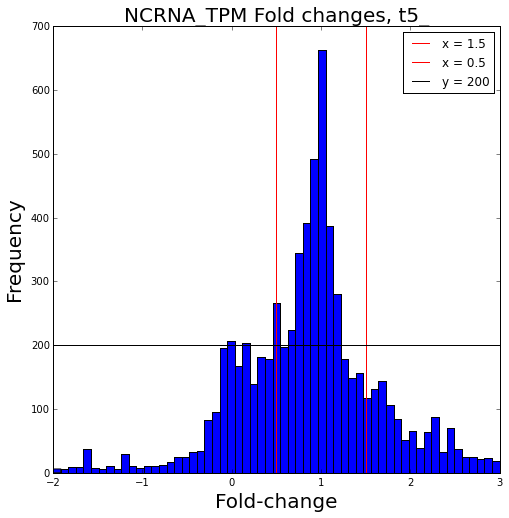

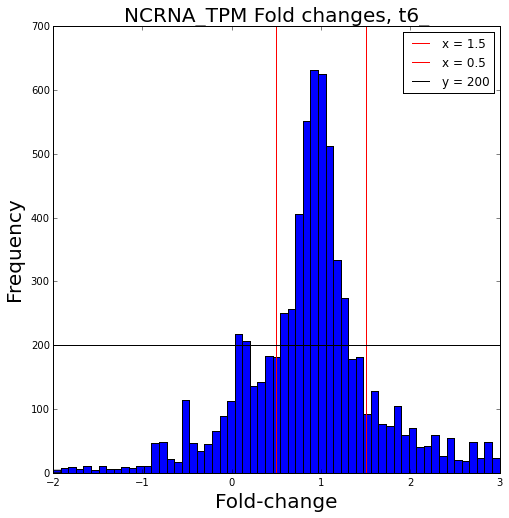

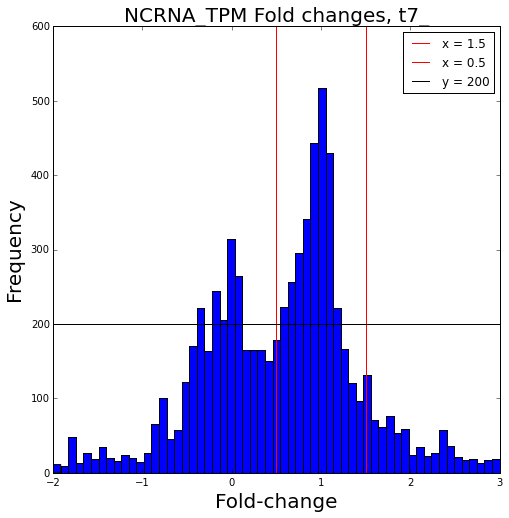

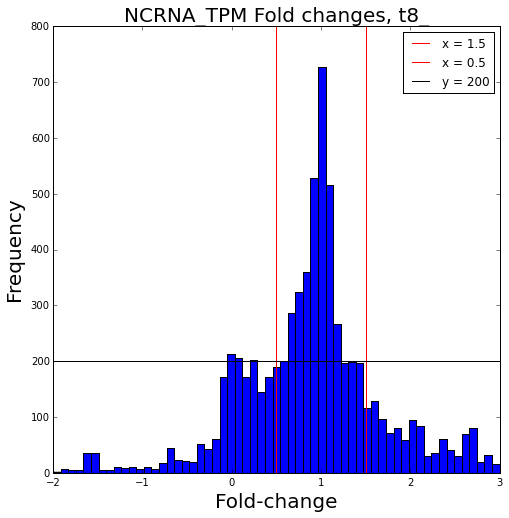

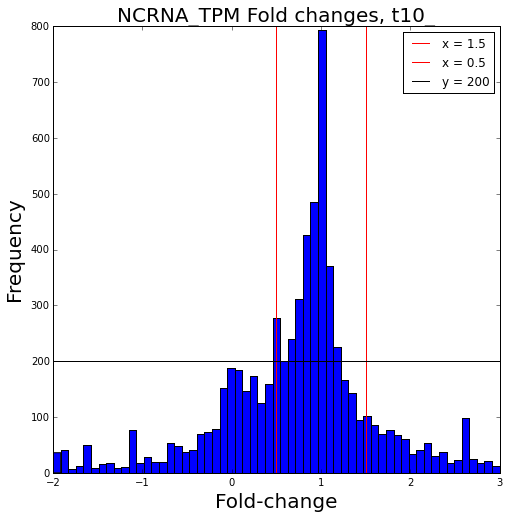

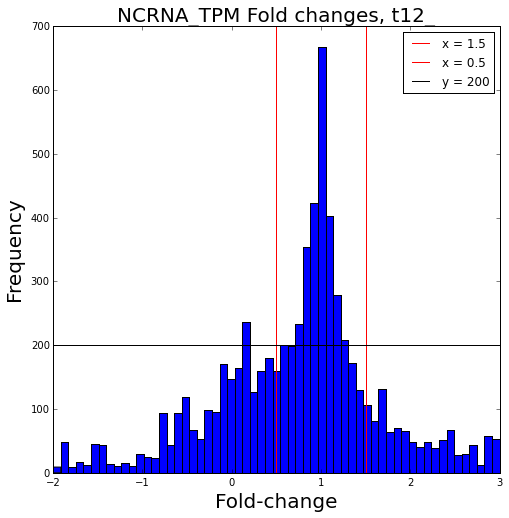

In [121]:
TS = data[fold_keys].values
plot_timepoint_histogram(TS, x_label="Fold-change", title_prefix=name + " Fold changes, ", same_axes=True, bins=60,
                        time_names = keys[1:], percentile_zoom=1, xlim=[-2, 3], 
                         save_prefix="/Users/jlu96/v-causal-snps/plots/GGR/" + name + "_foldchange_hist_",
                        line_color_labels=[(1.5, 'r', "x = 1.5"), (0.5, 'r', "x = 0.5")],
                        horizontal_line_color_labels=[(200, 'k', "y = 200")])

[-0.5        -0.47959184 -0.45918367 -0.43877551 -0.41836735 -0.39795918
 -0.37755102 -0.35714286 -0.33673469 -0.31632653 -0.29591837 -0.2755102
 -0.25510204 -0.23469388 -0.21428571 -0.19387755 -0.17346939 -0.15306122
 -0.13265306 -0.1122449  -0.09183673 -0.07142857 -0.05102041 -0.03061224
 -0.01020408  0.01020408  0.03061224  0.05102041  0.07142857  0.09183673
  0.1122449   0.13265306  0.15306122  0.17346939  0.19387755  0.21428571
  0.23469388  0.25510204  0.2755102   0.29591837  0.31632653  0.33673469
  0.35714286  0.37755102  0.39795918  0.41836735  0.43877551  0.45918367
  0.47959184  0.5       ]


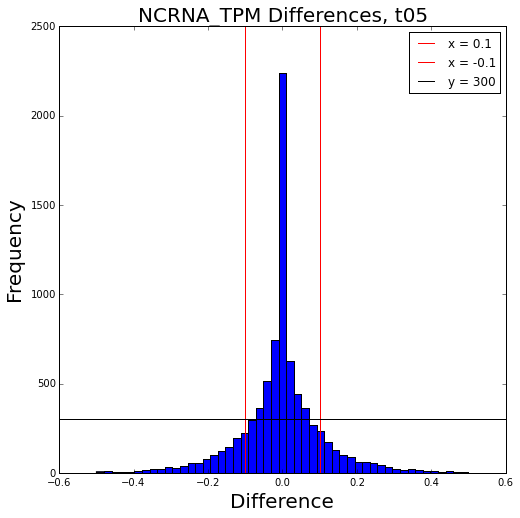

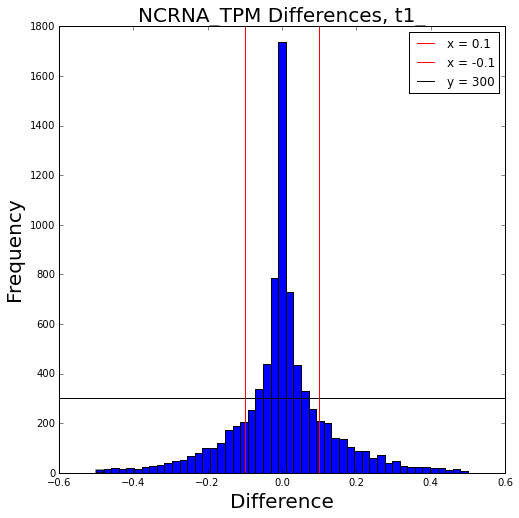

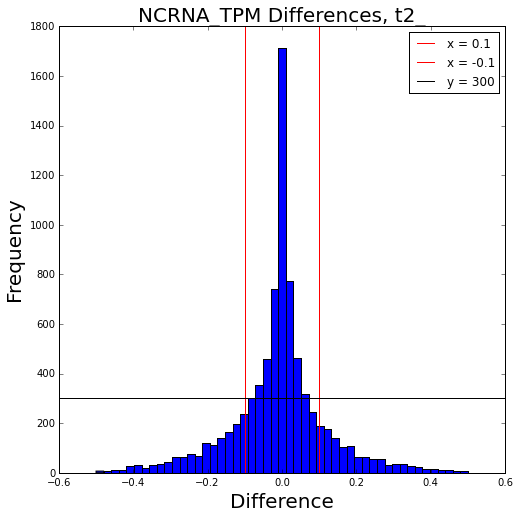

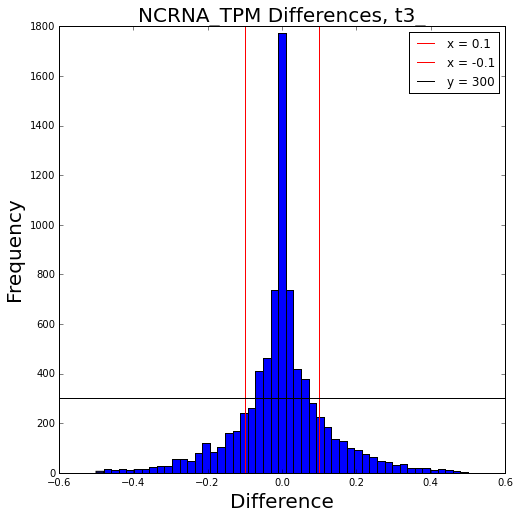

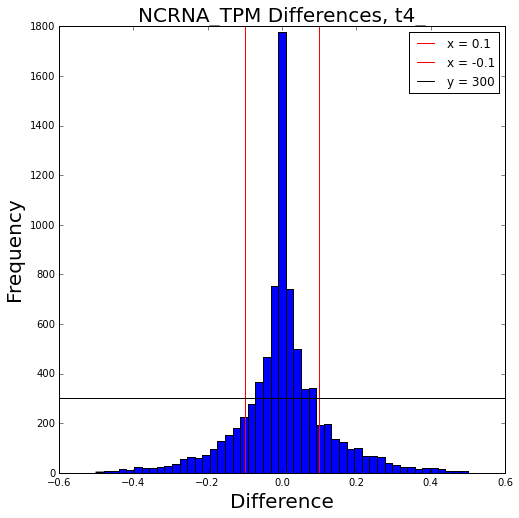

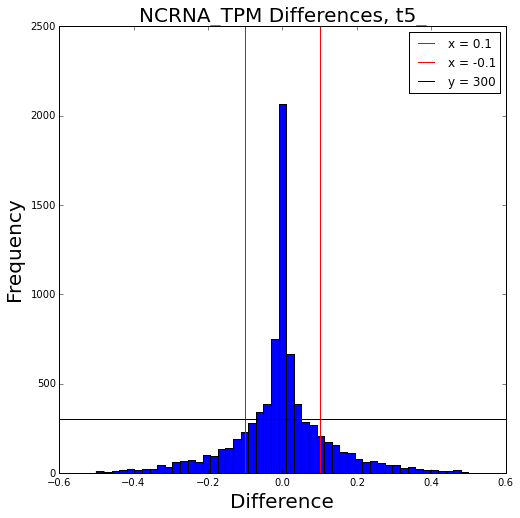

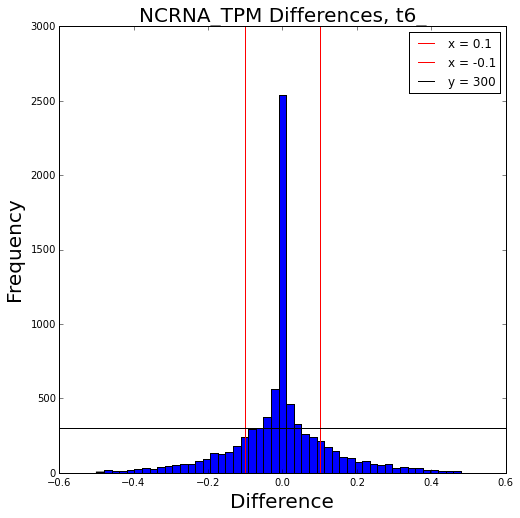

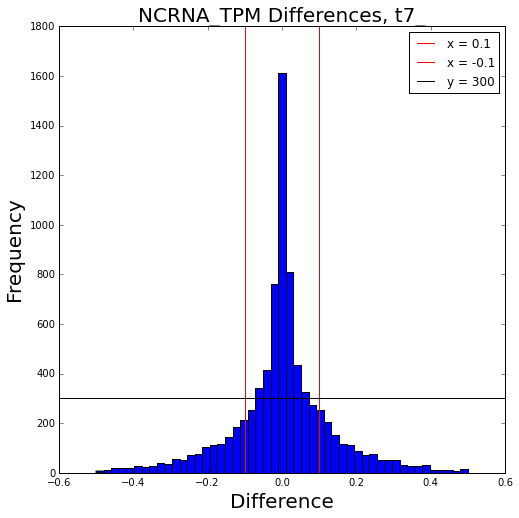

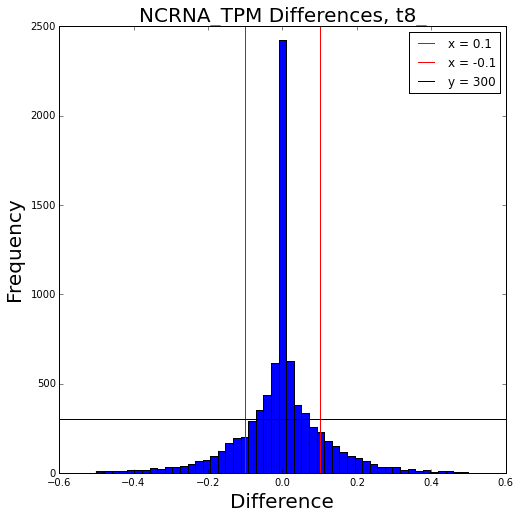

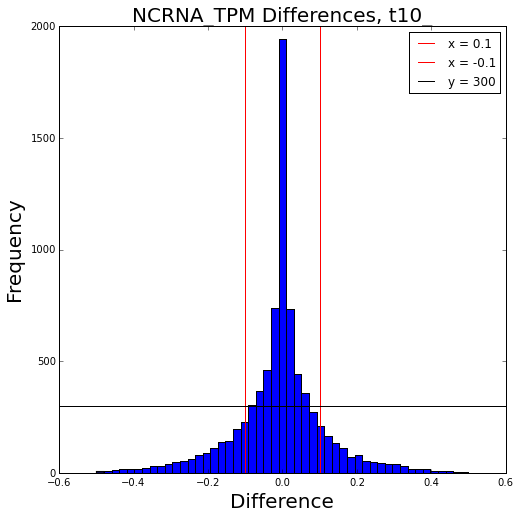

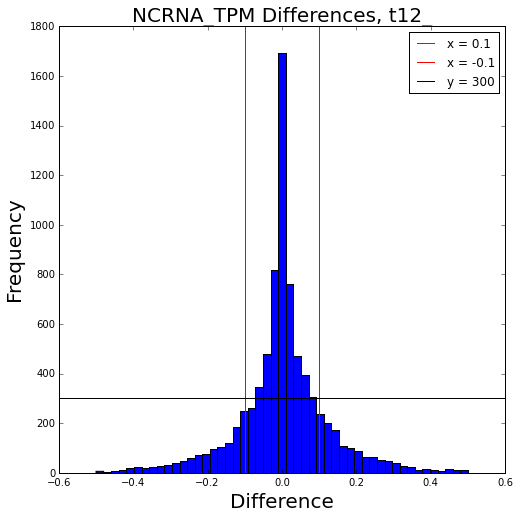

In [122]:
TS = data[diff_keys].values
plot_timepoint_histogram(TS, x_label="Difference", title_prefix=name + " Differences, ", same_axes=True, bins=50,
                         xlim=[-0.5, 0.5], time_names = keys[1:],
                         save_prefix="/Users/jlu96/v-causal-snps/plots/GGR/" + name + "_difference_hist_",
                         line_color_labels=[(0.1, 'r', "x = 0.1"), (-0.1, 'r', "x = -0.1")],
                         horizontal_line_color_labels=[(300, 'k', "y = 300")])

[-3.0073894  -2.88629015 -2.76519089 -2.64409164 -2.52299239 -2.40189313
 -2.28079388 -2.15969462 -2.03859537 -1.91749612 -1.79639686 -1.67529761
 -1.55419835 -1.4330991  -1.31199985 -1.19090059 -1.06980134 -0.94870208
 -0.82760283 -0.70650358 -0.58540432 -0.46430507 -0.34320581 -0.22210656
 -0.10100731  0.02009195  0.1411912   0.26229046  0.38338971  0.50448896
  0.62558822  0.74668747  0.86778673  0.98888598  1.10998523  1.23108449
  1.35218374  1.473283    1.59438225  1.7154815   1.83658076  1.95768001
  2.07877927  2.19987852  2.32097777  2.44207703  2.56317628  2.68427554
  2.80537479  2.92647404]


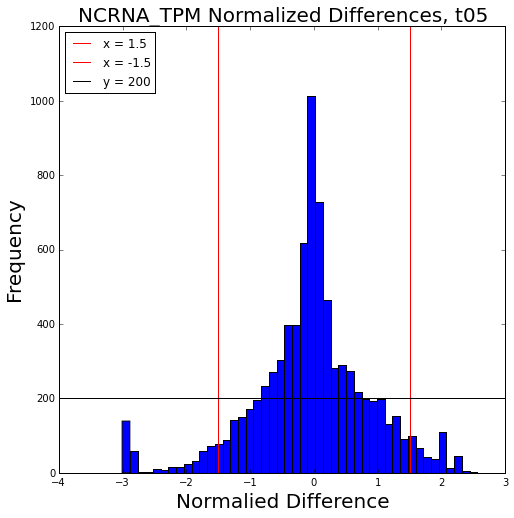

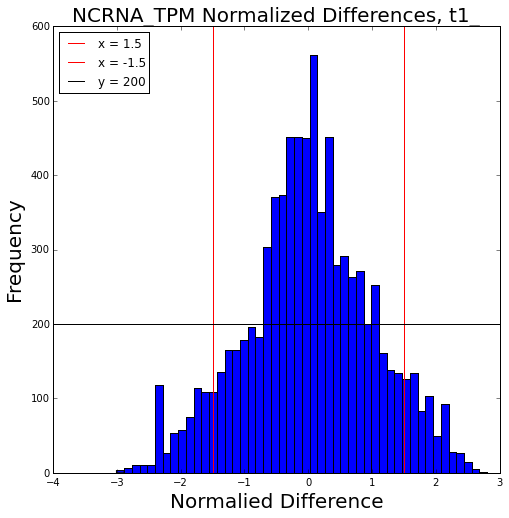

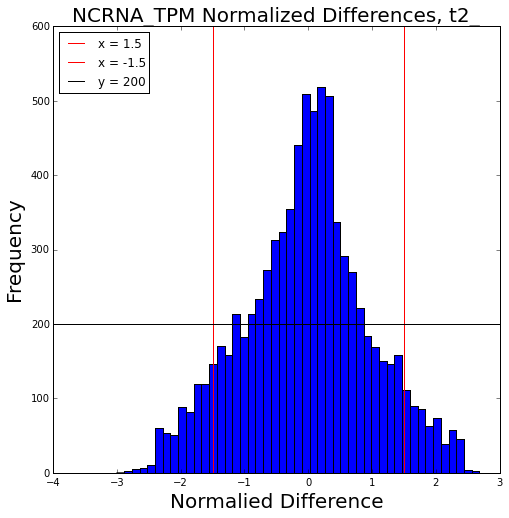

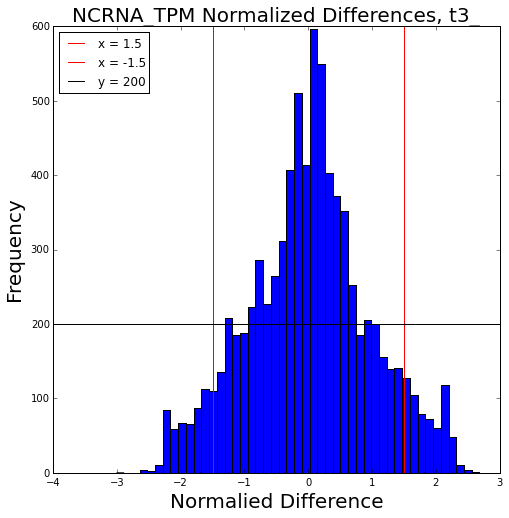

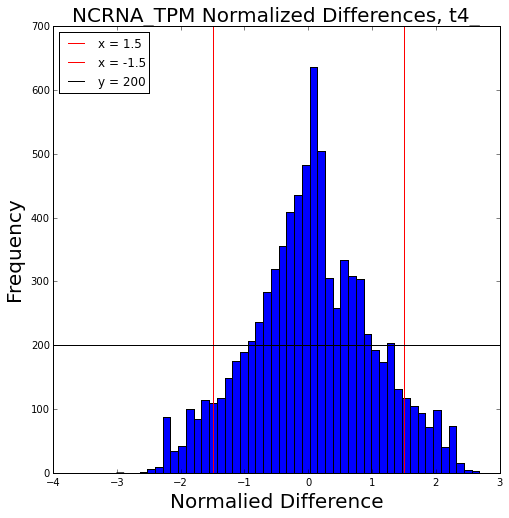

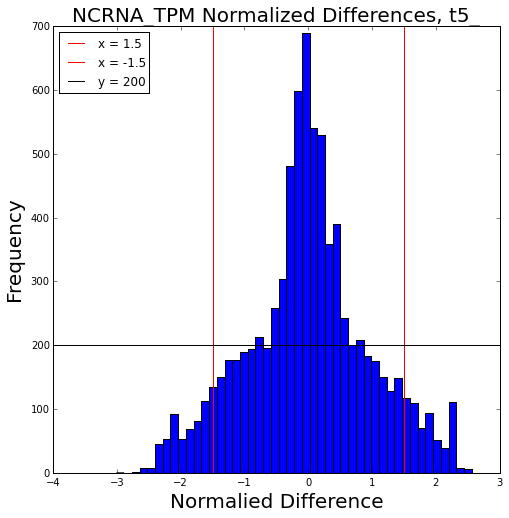

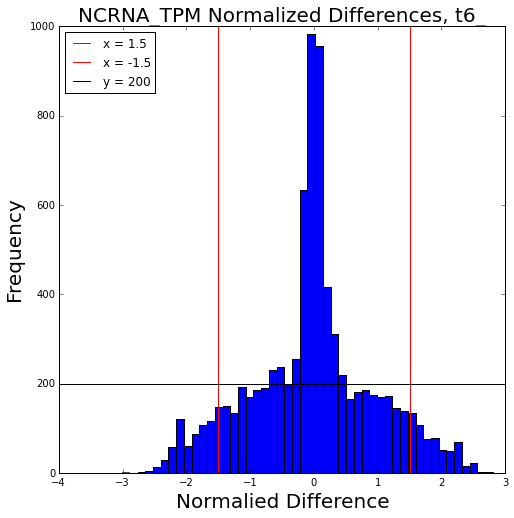

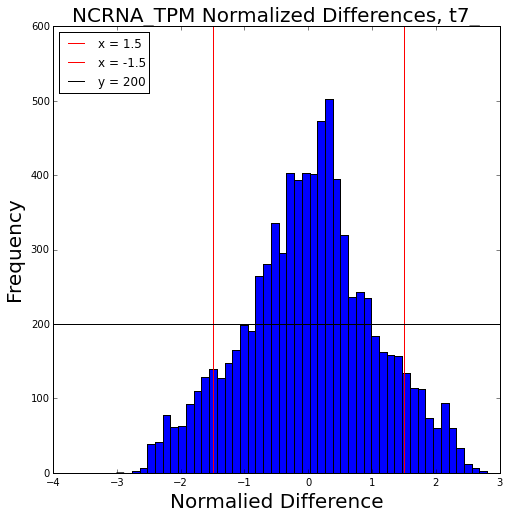

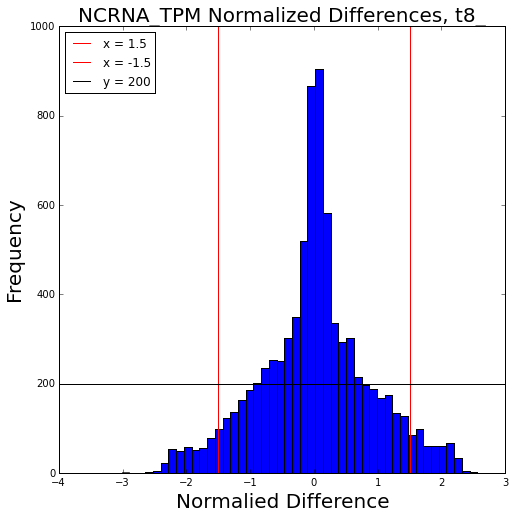

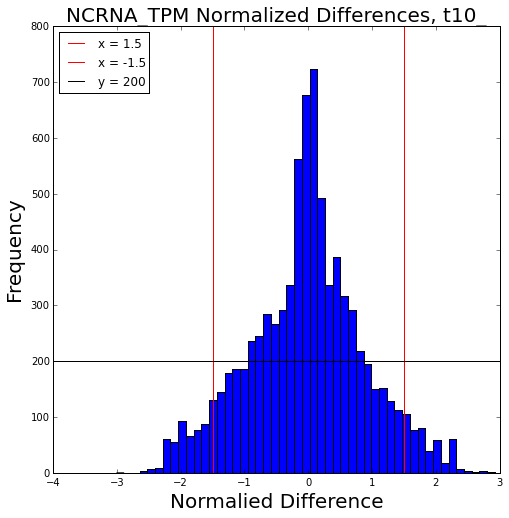

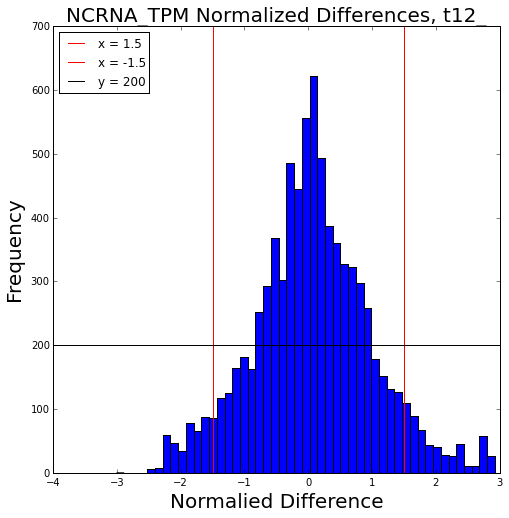

In [7]:
TS = data[normal_diff_keys].values
plot_timepoint_histogram(TS, x_label="Normalied Difference", title_prefix=name + " Normalized Differences, ", same_axes=True, bins=50,
                           time_names = keys[1:],
                          save_prefix="/Users/jlu96/v-causal-snps/plots/GGR/" + name + "_norm_difference_hist_",
                          line_color_labels=[(1.5, 'r', "x = 1.5"), (-1.5, 'r', "x = -1.5")],
                          horizontal_line_color_labels=[(200, 'k', "y = 200")])

# Get Genes' greatest differential expression
# Find those genes with greatest diff
# Save as extreme-change genes



In [6]:
normal_diffs = data[normal_diff_keys].values
print normal_diffs
max_normal_diffs = np.max(normal_diffs, axis=1)
print max_normal_diffs
min_normal_diffs = np.min(normal_diffs, axis=1)
print min_normal_diffs

import scipy.stats as stats
max10 = stats.scoreatpercentile(max_normal_diffs, 90)
print "10th percentile of max normal is ", max10
plt.figure()
plt.hist(max_normal_diffs)
plt.axvline(x=max10, label="Top 10%", color="red")
plt.legend()
plt.show()

import scipy.stats as stats
min10 = stats.scoreatpercentile(min_normal_diffs, 10)
print "10th percentile of min normal is ", min10
plt.figure()
plt.hist(min_normal_diffs)
plt.axvline(x=min10, label="Bottom 10%", color="red")
plt.legend()
plt.show()

# Let's take the genes with normalized difference in extreme
# > 2 or < -2


data["Max normal_diff"] = max_normal_diffs
data["Min normal_diff"] = min_normal_diffs
change_data = data[(data["Max normal_diff"] > max10 )| (data['Min normal_diff'] < min10)]
print change_data.shape

newfilename = filenames[0][:-4] + "_extreme-change.txt"
change_data.to_csv(newfilename, columns=original_keys, index=False, sep='\t')
print "Changed data written to ", newfilename

plt.hist(change_data["Max normal_diff"], alpha=0.5)
plt.hist(change_data["Min normal_diff"], alpha=0.5)

[[-0.04896471  0.08722267  0.07154172 ...,  0.01168533  0.0355659  -0.06441   ]
 [-0.04991827 -0.10358484  0.056754   ...,  2.23098126 -2.12779342
  -0.02233695]
 [ 0.70889478 -0.33461622 -1.47089138 ...,  1.33411892 -1.70456845
   1.51837153]
 ..., 
 [-0.57723246  1.32053578 -0.85991524 ...,  1.6411244  -0.90723865
  -0.58260389]
 [ 0.80600771  0.24126255 -0.71339366 ..., -0.81304467 -0.88452186
   0.07720697]
 [-0.99198955 -1.05425878  0.77060677 ...,  0.24781543  1.7884309
  -1.20237279]]
[ 2.25867215  2.23098126  1.51837153 ...,  1.6411244   1.62149793
  1.7884309 ]
[-2.2030843  -2.12779342 -1.70456845 ..., -0.90723865 -1.42607223
 -1.20237279]
